# Tarea 2 - Ejercicios Matplot

> Estudiante: Eduardo Zhizhpón<br/>
> Asignatura: Simulación

## Utilizar Matplot y Plotly para realizar las graficas.

In [1]:
# importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# carga del dataset
fifa_df = pd.read_csv('fifa_datos.csv')
print('Cantidad de instancias = ', fifa_df.shape[0])
fifa_df.head()

Cantidad de instancias =  18207


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 1. Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

In [2]:
# Convierte valores con "lbs" a int y rellena los valores
# nulos con 0
def get_values_from_lbs(df):
    return df['Weight'].str.extract('(\d+)').fillna(0).astype(int)[0]

# Filtra los datos por el peso y un rango
def get_data_by_weight_and_range(df, range=(0,100)):
    # df_sorted = df.sort_values(by=['Weight'])
    weight_converted = get_values_from_lbs(df)
    
    # Para obtener datos arriba de (>= 125, None)
    if range[0] != None and range[1] == None:
        df_filtered = df[(weight_converted >= range[0])]

    # Para obtener datos debajo de (None, < 125)
    elif range[0] == None and range[1] != None:
        df_filtered = df[(weight_converted < range[1])]

    # Para obtener datos entre (>= 0, < 125)
    elif range[0] != None and range[1] != None:
        df_filtered = df[(weight_converted >= range[0]) & (weight_converted < range[1])]
        
    print('Jugadores Filtrados = ', df_filtered.shape[0])
    return df_filtered

In [3]:
# Cantidad de valores nulos de acuerdo al peso
weight_nan = fifa_df['Weight'].isnull().sum()
print('Cantidad de valores nulos = ', weight_nan)

Cantidad de valores nulos =  48


* Debajo 125 Lbs.

In [4]:
# NOTA: se puso a partir de 1 porque los valores con 0
#       son valores que eran 
fifa_1_125 = get_data_by_weight_and_range(fifa_df, range=(1, 125))

Jugadores Filtrados =  41


* 125-150

In [5]:
fifa_125_150 = get_data_by_weight_and_range(fifa_df, range=(125, 150))

Jugadores Filtrados =  2290


* 150-175

In [6]:
fifa_150_175 = get_data_by_weight_and_range(fifa_df, range=(150, 175))

Jugadores Filtrados =  10876


* 175 o superior

In [7]:
fifa_175_more = get_data_by_weight_and_range(fifa_df, range=(175, None))

Jugadores Filtrados =  4952


* Cuadro tipo PIE

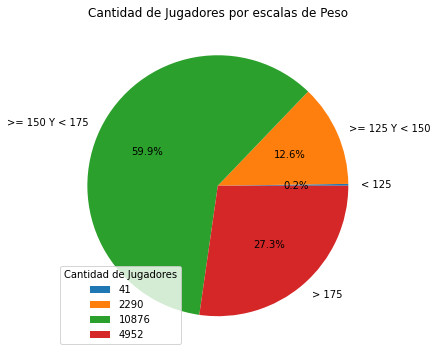

In [8]:
y = [fifa_1_125.shape[0], fifa_125_150.shape[0], 
    fifa_150_175.shape[0], fifa_175_more.shape[0]]
labels = ['< 125', '>= 125 Y < 150', 
    '>= 150 Y < 175', '> 175']

fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1, 1, 1)
axes.pie(y, labels=labels, autopct='%1.1f%%')
axes.set_title('Cantidad de Jugadores por escalas de Peso')

# fig.tight_layout()
plt.legend(y, title='Cantidad de Jugadores', loc=3)
plt.show()

### 2. Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90

In [43]:
overall_40 = fifa_df[(fifa_df['Overall'] >= 40) & (fifa_df['Overall'] < 50)].shape[0]

overall_50 = fifa_df[(fifa_df['Overall'] >= 50) & (fifa_df['Overall'] < 60)].shape[0]

overall_60 = fifa_df[(fifa_df['Overall'] >= 60) & (fifa_df['Overall'] < 70)].shape[0]

overall_70 = fifa_df[(fifa_df['Overall'] >= 70) & (fifa_df['Overall'] < 80)].shape[0]

overall_80 = fifa_df[(fifa_df['Overall'] >= 80) & (fifa_df['Overall'] <= 90)].shape[0]

* Gráfico de barras

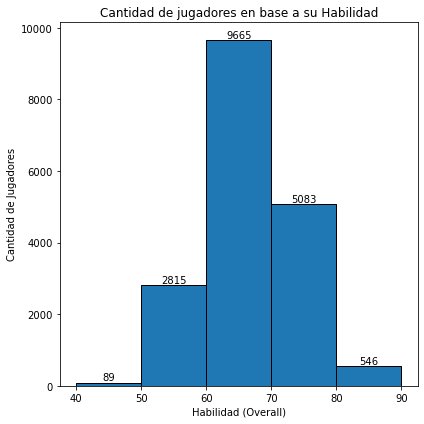

In [50]:
overall_result = [overall_40, overall_50, overall_60, 
    overall_70, overall_80]

fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1, 1, 1)
axes.bar([40, 50, 60, 70, 80], overall_result, width=10, align='edge', 
    edgecolor='black')
axes.set_title('Cantidad de jugadores en base a su Habilidad')
axes.set_xlabel('Habilidad (Overall)')
axes.set_ylabel('Cantidad de Jugadores')

# Establece los valores a cada barra
for bars in axes.containers:
    axes.bar_label(bars)

fig.tight_layout()
plt.show()

### 3. Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.

La herramienta para generar reportes investigada es "ProfileReport" perteneciente al paquete de "pandas_profiling". Para ello, se puede instalar de la siguinete manera:

```sh
$ pip install pandas_profiling
```

Esta herramienta genera reportes desde la clase "DataFrame" de "pandas". Pandas es una popular librería desarrollada en Python, muy usada en el ámbiro de *Data Science* y *Machine Learning*, gracias a su estructura poderosa y flexible para la manipulación y tratamiento de datos. Esta permite básicamente cargar datos, modelar, analizar, manipular y preparar datos.

Un *Data Frame* es una estructura bidimensional con columnas (*Series*) que pueden ser también de cualquier tipo. Por ejemplo, tenemos la siguiente carga de datos, donde se puede observar una tabla bidimensional con la información obtenida desde un archivo "CSV".

In [3]:
import pandas as pd
gas_df = pd.read_csv('gas_precios.csv')
gas_df.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


Por otro lado, la herramienta *pandas_profiling* ayuda la generación de informes desde un *Data Frame* que permite un análisis exploratorio de los datos. Donde, se puede determinar la variables con mayor importancia dentro del conjunto de datos. Para ello, esta librería presenta un informe interactivo con las siguientes estadísticas para cada columna o *Series* del *Data Frame* ([datasource.ai](https://www.datasource.ai/uploads/d8bd6d716a55e75759045076654f51b3.html#:~:text=Pandas%20Profiling%20es%20una%20librer%C3%ADa,datos%20m%C3%A1s%20serio%20y%20detallado.), 2022).

* Inferencia de tipo: detectar los tipos de columnas en un dataframe.
* Esenciales: tipo, valores únicos, valores perdidos
* Estadísticas de cantidad como valor mínimo, Q1, mediana, Q3, máximo, rango, rango intercuartíl
* Estadísticas descriptivas como la media, la moda, la desviación estándar, la suma, la mediana de la desviación absoluta, el coeficiente de variación, la curtosis, la asimetría
* Los valores más frecuentes
* Histogramas
* Correlaciones destacadas de variables altamente correlacionadas, matrices de Spearman, Pearson y Kendall
* Matriz de valores perdidos, recuento, mapa de calor y dendrograma de valores perdidos
* Análisis de texto aprende sobre las categorías (Mayúsculas, Espacio), guiones (Latín, Cirílico) y bloques (ASCII) de datos de texto.
* Análisis de archivos e imágenes extrae los tamaños de los archivos, las fechas de creación y las dimensiones y escanea las imágenes truncadas o que contienen información EXIF.

Para tener una mejor perspectiva de su funcionamiento, se realizó el siguiente ejemplo utilizando un conjunto de datos "CSV" de precios de gas. Sin embargo, cabe recalcar que el contenido de los datos, deben tener una limpieza y transformación de ser necesaria para su correcto funcionamiento.

In [2]:
# Instalación del paquete desde Jupyter Notebook
%pip install pandas_profiling > /dev/null

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Importación de la librería
from pandas_profiling import ProfileReport

# Carga del dataset a un DataFrame
gas_df = pd.read_csv('gas_precios.csv')

# Obtención del reporte con pandas_profiling
prof = ProfileReport(gas_df)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Refereencias

Funcionamiento de "pandas_profiling". Obtenido de https://www.datasource.ai/uploads/d8bd6d716a55e75759045076654f51b3.html#:~:text=Pandas%20Profiling%20es%20una%20librer%C3%ADa,datos%20m%C3%A1s%20serio%20y%20detallado.